In [28]:
# Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Load the cleaned heart data CSV
heart_data_path = '../data/processed/cleaned_heart_data.csv'
heart_data = pd.read_csv(heart_data_path)

# Preview the data
heart_data.head(), heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   FastingBS          746 non-null    int64  
 4   MaxHR              746 non-null    int64  
 5   Oldpeak            746 non-null    float64
 6   HeartDisease       746 non-null    int64  
 7   Sex_M              746 non-null    bool   
 8   ChestPainType_ATA  746 non-null    bool   
 9   ChestPainType_NAP  746 non-null    bool   
 10  ChestPainType_TA   746 non-null    bool   
 11  RestingECG_Normal  746 non-null    bool   
 12  RestingECG_ST      746 non-null    bool   
 13  ExerciseAngina_Y   746 non-null    bool   
 14  ST_Slope_Flat      746 non-null    bool   
 15  ST_Slope_Up        746 non-null    bool   
dtypes: bool(9), float64(1), in

(   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
 0   40        140          289          0    172      0.0             0   
 1   49        160          180          0    156      1.0             1   
 2   37        130          283          0     98      0.0             0   
 3   48        138          214          0    108      1.5             1   
 4   54        150          195          0    122      0.0             0   
 
    Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
 0   True               True              False             False   
 1  False              False               True             False   
 2   True               True              False             False   
 3  False              False              False             False   
 4   True              False               True             False   
 
    RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
 0               True          False             Fals

In [42]:
# Set up splitting strategy
X = heart_data.drop(columns = 'HeartDisease')
y = heart_data['HeartDisease']

scoring = ['neg_log_loss', 'roc_auc', 'f1', 'accuracy', 'precision', 'recall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 70 to 102
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                596 non-null    int64  
 1   RestingBP          596 non-null    int64  
 2   Cholesterol        596 non-null    int64  
 3   FastingBS          596 non-null    int64  
 4   MaxHR              596 non-null    int64  
 5   Oldpeak            596 non-null    float64
 6   Sex_M              596 non-null    bool   
 7   ChestPainType_ATA  596 non-null    bool   
 8   ChestPainType_NAP  596 non-null    bool   
 9   ChestPainType_TA   596 non-null    bool   
 10  RestingECG_Normal  596 non-null    bool   
 11  RestingECG_ST      596 non-null    bool   
 12  ExerciseAngina_Y   596 non-null    bool   
 13  ST_Slope_Flat      596 non-null    bool   
 14  ST_Slope_Up        596 non-null    bool   
dtypes: bool(9), float64(1), int64(5)
memory usage: 37.8 KB


In [49]:
#Just baseline
ST_columns_to_drop = ['MaxHR', 'Oldpeak', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
X_train_baseline = X_train.drop(columns = ST_columns_to_drop)       
X_test_baseline = X_test.drop(columns = ST_columns_to_drop)     

#Just stress test data
Baseline_columns_to_drop = ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG_Normal', 'RestingECG_ST']
X_train_ST = X_train.drop(columns = Baseline_columns_to_drop)   
X_test2_ST = X_test.drop(columns = Baseline_columns_to_drop)   

#All features
X_train_all = X_train
X_test_all = X_test

In [7]:
pipe = Pipeline([
    ('clf', LogisticRegression())
])
pipe

Pipeline(steps=[('clf', LogisticRegression())])

In [9]:
pipe.get_params()

{'memory': None,
 'steps': [('clf', LogisticRegression())],
 'verbose': False,
 'clf': LogisticRegression(),
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__l1_ratio': None,
 'clf__max_iter': 100,
 'clf__multi_class': 'deprecated',
 'clf__n_jobs': None,
 'clf__penalty': 'l2',
 'clf__random_state': None,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_start': False}

# Perform GridSearchCV

In [12]:
param_grid = {
    'clf__C': [0.01, 0.5, 1.0],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear'],
    }

In [52]:
grid_cv_baseline = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_log_loss")
grid_cv_baseline.fit(X_train_baseline, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.01, 0.5, 1.0],
                         'clf__penalty': ['l1', 'l2'],
                         'clf__solver': ['liblinear']},
             refit='neg_log_loss',
             scoring=['neg_log_loss', 'roc_auc', 'f1', 'accuracy', 'precision',
                      'recall'])

In [53]:
res = grid_cv_baseline.cv_results_
res = pd.DataFrame(res)
res.columns

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'params', 
       'mean_test_neg_log_loss',
       'std_test_neg_log_loss', 'rank_test_neg_log_loss']].sort_values('rank_test_neg_log_loss')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_neg_log_loss,std_test_neg_log_loss,rank_test_neg_log_loss
4,0.006227,0.000409,0.004725,0.000107,"{'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__so...",-0.504882,0.040042,1
2,0.005727,0.000326,0.004498,0.000076,"{'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__so...",-0.508948,0.037500,2
5,0.001601,0.000078,0.004771,0.000365,"{'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__so...",-0.512427,0.044357,3
3,0.001440,0.000075,0.004293,0.000049,"{'clf__C': 0.5, 'clf__penalty': 'l2', 'clf__so...",-0.518583,0.041106,4
1,0.001378,0.000148,0.004575,0.000186,"{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...",-0.643544,0.011901,5
0,0.003885,0.001869,0.010321,0.007201,"{'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__s...",-0.686992,0.008463,6


In [43]:
grid_cv = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_log_loss")
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.01, 0.5, 1.0],
                         'clf__penalty': ['l1', 'l2'],
                         'clf__solver': ['liblinear']},
             refit='neg_log_loss',
             scoring=['neg_log_loss', 'roc_auc', 'f1', 'accuracy', 'precision',
                      'recall'])

In [44]:
res = grid_cv.cv_results_
res = pd.DataFrame(res)
res.columns

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'params', 
       'mean_test_neg_log_loss',
       'std_test_neg_log_loss', 'rank_test_neg_log_loss']].sort_values('rank_test_neg_log_loss')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_neg_log_loss,std_test_neg_log_loss,rank_test_neg_log_loss
3,0.001832,0.000089,0.004742,0.000261,"{'clf__C': 0.5, 'clf__penalty': 'l2', 'clf__so...",-0.380376,0.032941,1
5,0.001726,0.000050,0.004415,0.000078,"{'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__so...",-0.380515,0.031713,2
4,0.006191,0.001103,0.004551,0.000157,"{'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__so...",-0.384240,0.027679,3
2,0.003855,0.000554,0.004629,0.000169,"{'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__so...",-0.385399,0.026448,4
1,0.001518,0.000079,0.004588,0.000106,"{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...",-0.471324,0.042762,5
0,0.005432,0.002824,0.016322,0.015414,"{'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__s...",-0.593148,0.034828,6


In [15]:
grid_cv.best_params_

{'clf__C': 0.5, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}

In [24]:
final_model = grid_cv.best_estimator_

In [25]:
import pickle
with open ('best_LR_model.pkl','wb') as f: 
           pickle.dump(final_model, f)

In [26]:
# Obtain the predicted probabilities
y_test_prob = final_model.predict_proba(x_test)[:, 1]

In [35]:
print(final_model)

Pipeline(steps=[('clf', LogisticRegression(C=0.5, solver='liblinear'))])


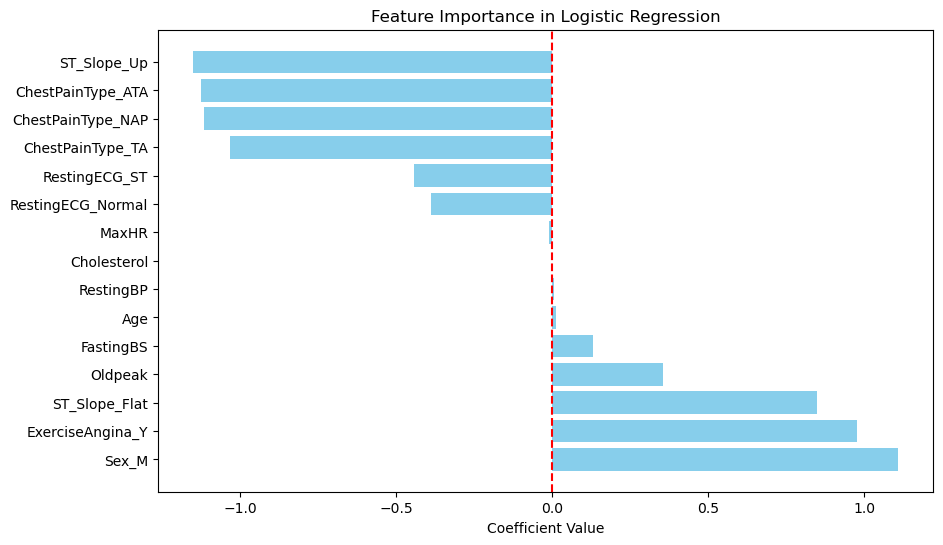

In [40]:
logistic_model = final_model.named_steps["clf"]

# Get feature names and coefficients
feature_names = x.columns
coefficients = logistic_model.coef_[0]

# Create a DataFrame for visualization
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color="skyblue")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()


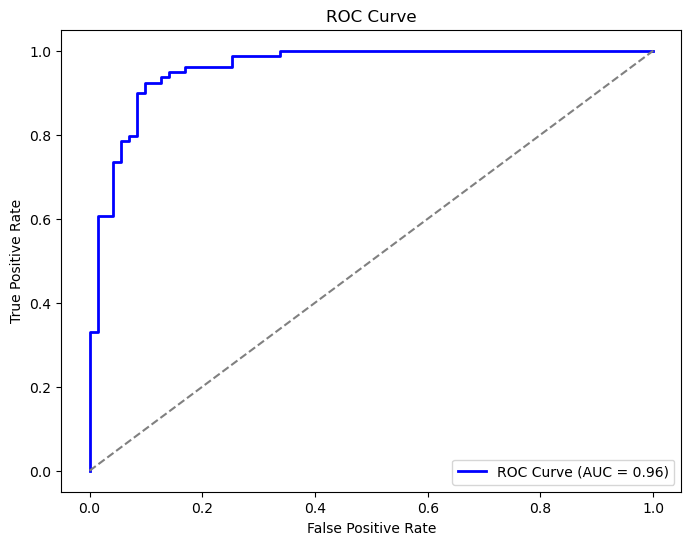

In [31]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


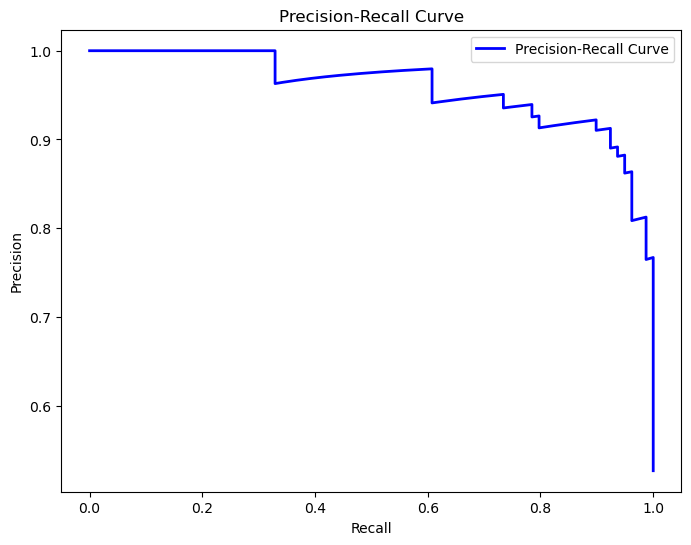

In [29]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
